In [1]:
# https://towardsdatascience.com/ridgeline-plots-the-perfect-way-to-visualize-data-distributions-with-python-de99a5493052

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install joypy

You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import json

f = open('rankings.json', 'r')

original_data = json.load(f)
f.close()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

In [5]:
print(original_data)

[{'strat': 'Switch to renewable energy', 'mu': 28.810016831403203, 'sigma': 0.845342494130488}, {'strat': 'Reducing emissions', 'mu': 28.19411415228989, 'sigma': 0.8417362905153214}, {'strat': 'Smart infrastructure', 'mu': 26.462183232547456, 'sigma': 0.8495127063172225}, {'strat': 'Reshape our cities to be less car-dependent', 'mu': 26.41529480061113, 'sigma': 0.8198899922971662}, {'strat': 'Cut on consumption', 'mu': 26.173288389671054, 'sigma': 0.8291786661048496}, {'strat': 'Implement a carbon tax', 'mu': 26.030778642626164, 'sigma': 0.822141210096605}, {'strat': 'Electric vehicles', 'mu': 25.563282951655676, 'sigma': 0.8323377006740641}, {'strat': 'Educational tools about the effects and causes of climate change', 'mu': 25.297672652027018, 'sigma': 0.8121877728772534}, {'strat': 'Decentralized energy production and distribution systems', 'mu': 24.65729875202904, 'sigma': 0.8231333210776334}, {'strat': 'Design computers/electronics for disassembly/deconstruction', 'mu': 24.20677062

In [6]:
import scipy.stats as stats

def norm(mu, sigma, n = 1000):
  a = mu - 3*sigma
  b = mu + 3*sigma
  dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
  return dist.rvs(n)

In [7]:
# created the basic data structure that will be plotted



data = []
for i in range(len(original_data)):
  d = original_data[i]
  n = 100000
  values = norm(d['mu'], d['sigma'], n)  
  strat = str(i+1).zfill(2) + '. ' + d['strat']
  for j in range(n):
    data.append([strat, values[j]])
  
df = pd.DataFrame(data, columns=['Strategy', 'Value'])
print(df)

                                    Strategy      Value
0             01. Switch to renewable energy  28.198334
1             01. Switch to renewable energy  28.325857
2             01. Switch to renewable energy  28.122421
3             01. Switch to renewable energy  28.066568
4             01. Switch to renewable energy  29.480326
5             01. Switch to renewable energy  27.647657
6             01. Switch to renewable energy  27.753947
7             01. Switch to renewable energy  29.607313
8             01. Switch to renewable energy  28.464893
9             01. Switch to renewable energy  29.412357
10            01. Switch to renewable energy  28.411545
11            01. Switch to renewable energy  28.791509
12            01. Switch to renewable energy  28.714025
13            01. Switch to renewable energy  29.581087
14            01. Switch to renewable energy  27.685484
15            01. Switch to renewable energy  29.561984
16            01. Switch to renewable energy  28

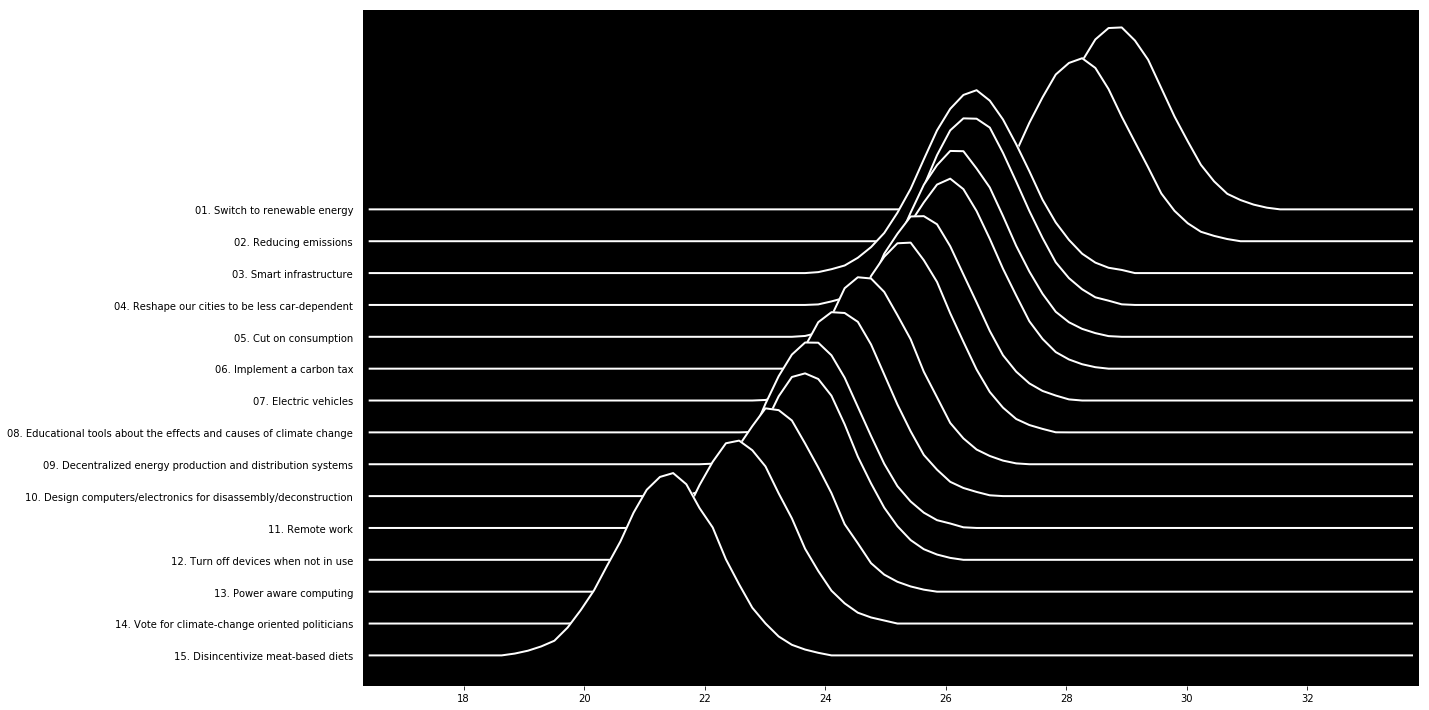

In [8]:
%matplotlib inline

fig, axes = joypy.joyplot(df, by="Strategy", 
                          grid=False, fill=True, color='k', background='k', linecolor="w", linewidth=2,
                          legend=False, overlap=4, figsize=(20,10), kind="counts", bins=80)


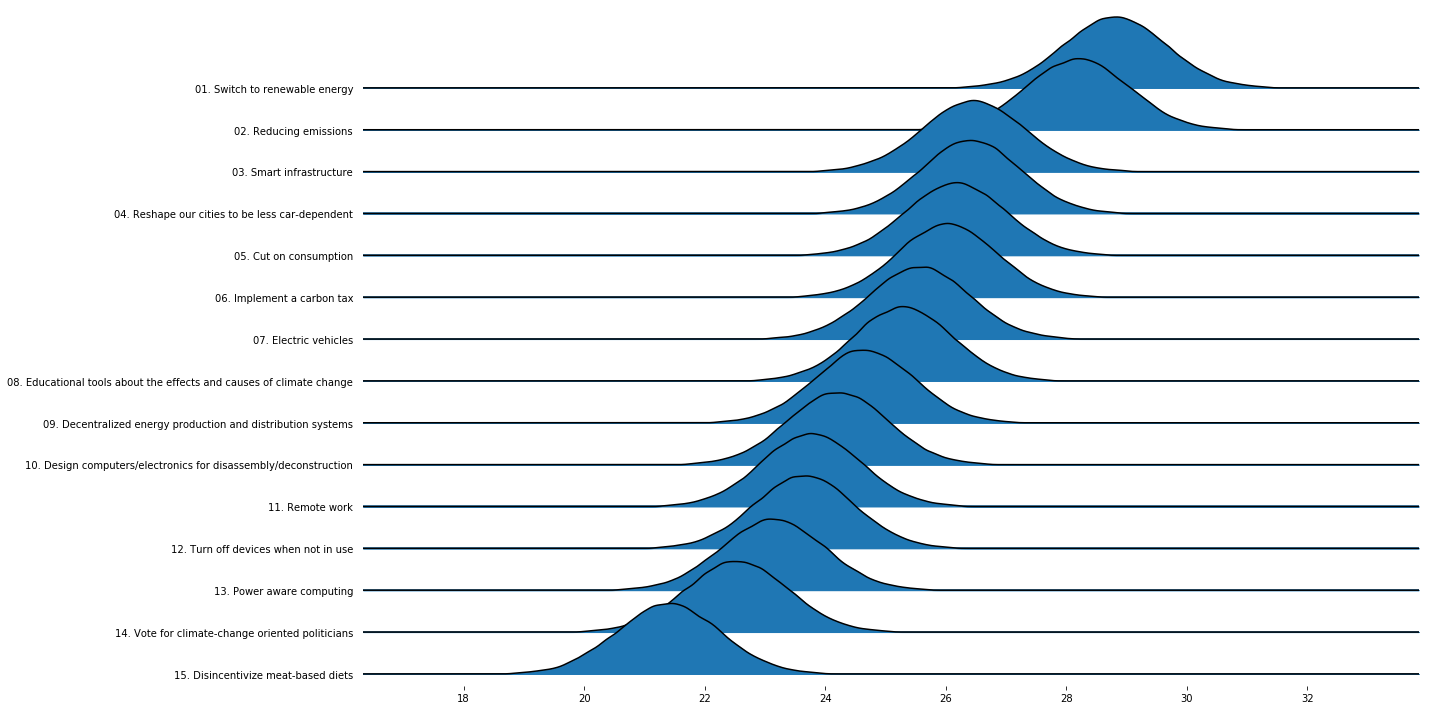

In [9]:
%matplotlib inline

fig, axes = joypy.joyplot(df, by="Strategy",figsize=(20,10))